In [ ]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
from operator import itemgetter
import matplotlib.pyplot as plt
from sklearn import preprocessing
from collections import OrderedDict
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from xgboost.sklearn import XGBClassifier
from imblearn.pipeline import Pipeline as pipe_imb
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score, make_scorer
from sklearn.neural_network import MLPClassifier
sns.set()
from sklearn.svm import LinearSVC
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import 
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss, f1_score, precision_score, recall_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats 
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import time
from sklearn import metrics  
from sklearn import preprocessing
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
sns.set()
import warnings
warnings.filterwarnings("ignore") # Don't want to see the warnings in the notebook
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn import model_selection
from sklearn.preprocessing import binarize
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import precision_score, recall_score, roc_auc_score, precision_recall_curve
from sklearn.metrics import f1_score, fbeta_score, accuracy_score, classification_report, average_precision_score
from datetime import datetime,timedelta
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours# Import libraries
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as pipe_imb
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.metrics import classification_report_imbalanced
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.pipeline import Pipeline as pipe_imb
from sklearn.ensemble import RandomForestClassifier as RF
import missingno as msno

In [ ]:
#Let's read the data file 
df = pd.read_csv("default of credit card clients.csv", sep=";", header=1)
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
#Some findings : There is a "-2" category that isn't explained properly. There isn't any "PAY_1" column. 

In [ ]:
df=df.rename(columns={"default payment next month":"defaulted"})

In [ ]:
df['ToplamOdeme_6ay']= (df['PAY_AMT1'] + df['PAY_AMT2']+ df['PAY_AMT3']+ df['PAY_AMT4']+ df['PAY_AMT5']+ df['PAY_AMT6'])

def age(ToplamOdeme_6ay):
    if ToplamOdeme_6ay<=1000:
      return "0"
    if ToplamOdeme_6ay> 1000:
      return "1"

df['ToplamOdeme_6ay_flag']=df['ToplamOdeme_6ay'].apply(age)

df['Overall_Gecikme']= (df['PAY_0'] + df['PAY_2']+ df['PAY_3']+ df['PAY_4']+ df['PAY_5']+ df['PAY_6'])


def age(Overall_Gecikme):
    if Overall_Gecikme <=0:
      return "0"
    if Overall_Gecikme > 0:
      return "1"


df['Overall_Gecikme_flag']=df['Overall_Gecikme'].apply(age)

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted,ToplamOdeme_6ay,ToplamOdeme_6ay_flag,Overall_Gecikme,Overall_Gecikme_flag
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,689,0,-2,0
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,5000,1,3,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,11018,1,0,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,8388,1,0,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,59049,1,-2,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    30000 non-null  int64 
 1   LIMIT_BAL             30000 non-null  int64 
 2   SEX                   30000 non-null  int64 
 3   EDUCATION             30000 non-null  int64 
 4   MARRIAGE              30000 non-null  int64 
 5   AGE                   30000 non-null  int64 
 6   PAY_0                 30000 non-null  int64 
 7   PAY_2                 30000 non-null  int64 
 8   PAY_3                 30000 non-null  int64 
 9   PAY_4                 30000 non-null  int64 
 10  PAY_5                 30000 non-null  int64 
 11  PAY_6                 30000 non-null  int64 
 12  BILL_AMT1             30000 non-null  int64 
 13  BILL_AMT2             30000 non-null  int64 
 14  BILL_AMT3             30000 non-null  int64 
 15  BILL_AMT4             30000 non-null

In [ ]:
# Convert to categorical variables
df.SEX = df.SEX.astype('category')
df.MARRIAGE = df.MARRIAGE.astype('category')

In [ ]:
df.describe()

,ID,LIMIT_BAL,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,ToplamOdeme_6ay,Overall_Gecikme
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000
mean,15000.500000,167484.322667,1.853133,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,3.165139e+04,-1.094633
std,8660.398374,129747.661567,0.790349,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,6.082768e+04,5.893055
min,1.000000,10000.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000e+00,-12.000000
25%,7500.750000,50000.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,6.679750e+03,-5.000000
50%,15000.500000,140000.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,1.438300e+04,0.000000
75%,22500.250000,240000.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,3.350350e+04,0.000000
max,30000.000000,1000000.000000,6.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,3.764066e+06,36.000000


In [ ]:
df.isnull().any()
# There is not any missing value.

ID                      False
LIMIT_BAL               False
SEX                     False
EDUCATION               False
MARRIAGE                False
AGE                     False
PAY_0                   False
PAY_2                   False
PAY_3                   False
PAY_4                   False
PAY_5                   False
PAY_6                   False
BILL_AMT1               False
BILL_AMT2               False
BILL_AMT3               False
BILL_AMT4               False
BILL_AMT5               False
BILL_AMT6               False
PAY_AMT1                False
PAY_AMT2                False
PAY_AMT3                False
PAY_AMT4                False
PAY_AMT5                False
PAY_AMT6                False
defaulted               False
ToplamOdeme_6ay         False
ToplamOdeme_6ay_flag    False
Overall_Gecikme         False
Overall_Gecikme_flag    False
dtype: bool

In [ ]:
print('# people defaulted   = {}'.format(len(df[df['defaulted'] == 1])))
print('# people not defaulted = {}'.format(len(df[df['defaulted'] == 0])))  
print('% people defaulted   = {}%'.format(round(float(len(df[df['defaulted'] == 1])) / len(df) * 100), 3))

# there seems imbalanced data (%22)

# people defaulted   = 6636
# people not defaulted = 23364
% people defaulted   = 22%


X2: Gender (1 = male; 2 = female).
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)
X4: Marital status (1 = married; 2 = single; 3 = others).

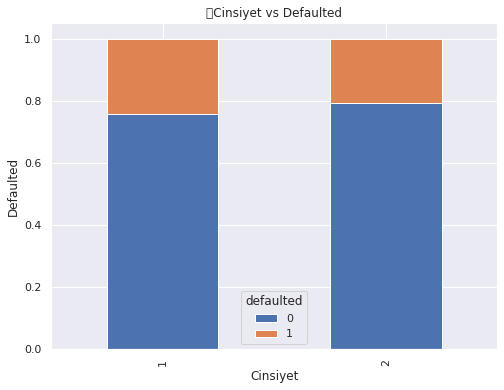

In [ ]:
table=pd.crosstab(df.SEX, df.defaulted)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', figsize=(8,6), stacked=True)
plt.title('	Cinsiyet vs Defaulted')
plt.xlabel('Cinsiyet')
plt.ylabel('Defaulted')
plt.show()

# there seems there is a bit difference between SEX in terms of defaulted ratio. Male has higher defaulted ratio than women 

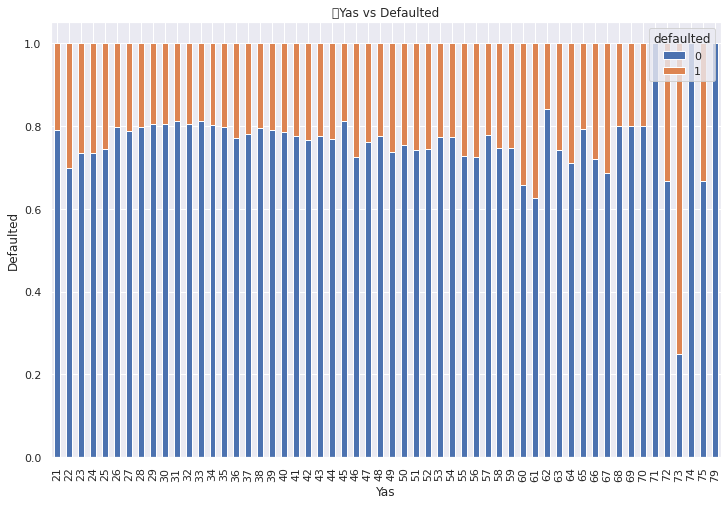

In [ ]:
table=pd.crosstab(df.AGE, df.defaulted)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', figsize=(12,8), stacked=True)
plt.title('	Yas vs Defaulted')
plt.xlabel('Yas')
plt.ylabel('Defaulted')
plt.show()
# It seems age affects the ratio of default. 55+ customers has higher default ratio (% 27) , whereas 30- 45 customers has averae default rati( % 21) and age=<29 is %23 default ratio

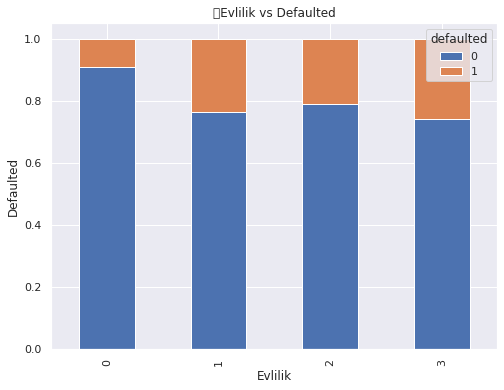

In [ ]:
table=pd.crosstab(df.MARRIAGE, df.defaulted)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', figsize=(8,6), stacked=True)
plt.title('	Evlilik vs Defaulted')
plt.xlabel('Evlilik')
plt.ylabel('Defaulted')
plt.show()

# It seems deafult rate of Marriage categories seems similar. There is "0" category but since it is very low number of customers (54 out of 30000), it is ignored

In [ ]:
df.MARRIAGE[df.MARRIAGE==0].count()

54

In [ ]:
df.groupby("MARRIAGE").defaulted.describe()

,count,mean,std,min,25%,50%,75%,max
MARRIAGE,,,,,,,,
0,54.0,0.092593,0.292582,0.0,0.0,0.0,0.0,1.0
1,13659.0,0.234717,0.423837,0.0,0.0,0.0,0.0,1.0
2,15964.0,0.209283,0.406810,0.0,0.0,0.0,0.0,1.0
3,323.0,0.260062,0.439349,0.0,0.0,0.0,1.0,1.0


In [ ]:
df.groupby("EDUCATION").defaulted.describe()
# There is no explanation of category level "0"&"5"&"6". since the number is low ( 14+280+ 51 out of 30000) it is ignored. 

,count,mean,std,min,25%,50%,75%,max
EDUCATION,,,,,,,,
0,14.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,10585.0,0.192348,0.394163,0.0,0.0,0.0,0.0,1.0
2,14030.0,0.237349,0.425473,0.0,0.0,0.0,0.0,1.0
3,4917.0,0.251576,0.433963,0.0,0.0,0.0,1.0,1.0
4,123.0,0.056911,0.232619,0.0,0.0,0.0,0.0,1.0
5,280.0,0.064286,0.245700,0.0,0.0,0.0,0.0,1.0
6,51.0,0.156863,0.367290,0.0,0.0,0.0,0.0,1.0


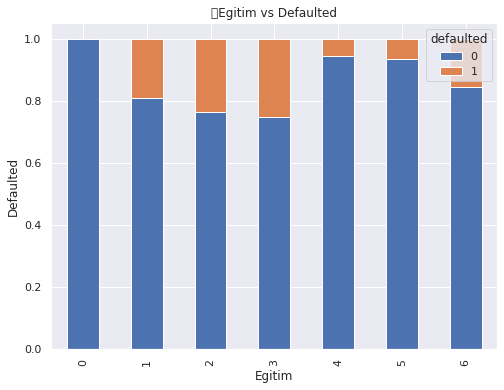

In [ ]:
table=pd.crosstab(df.EDUCATION, df.defaulted)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', figsize=(8,6), stacked=True)
plt.title('	Egitim vs Defaulted')
plt.xlabel('Egitim')
plt.ylabel('Defaulted')
plt.show()
# ıt seems there is diffference on defaulted ratio between education level. Customers whose education level high school is the highest defaulted ratio. It is ordinal varible.

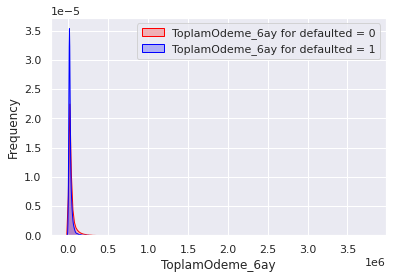

In [ ]:
g = sns.kdeplot(df['ToplamOdeme_6ay'][(df["defaulted"] == 0)], color="Red", shade = True)
g = sns.kdeplot(df['ToplamOdeme_6ay'][(df["defaulted"] == 1)], ax =g, color="Blue", shade= True)
g.set_xlabel('ToplamOdeme_6ay')
g.set_ylabel("Frequency")
g = g.legend(["ToplamOdeme_6ay for defaulted = 0", "ToplamOdeme_6ay for defaulted = 1"])

# I would rather use a flag for ToplamOdeme_6ay

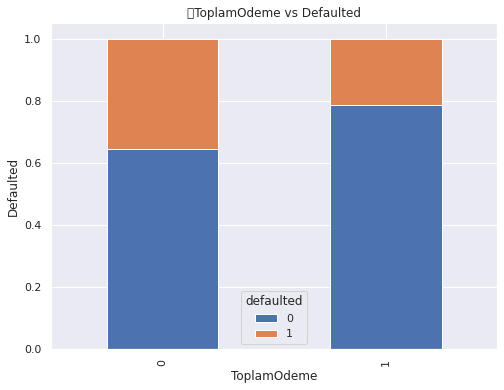

In [ ]:
table=pd.crosstab(df.ToplamOdeme_6ay_flag, df.defaulted)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', figsize=(8,6), stacked=True)
plt.title('	ToplamOdeme vs Defaulted')
plt.xlabel('ToplamOdeme')
plt.ylabel('Defaulted')
plt.show()

# There is significantly difference on defaulted ratio betweeen  customers who has payment delay or not. 

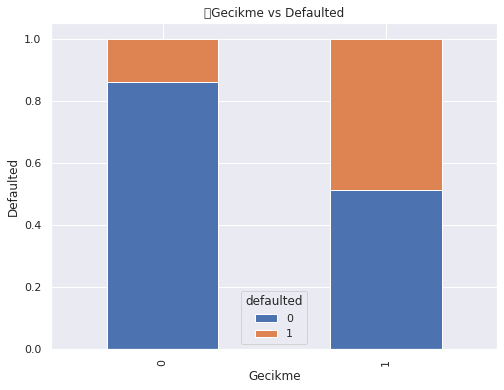

In [ ]:
table=pd.crosstab(df.Overall_Gecikme_flag, df.defaulted)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', figsize=(8,6), stacked=True)
plt.title('	Gecikme vs Defaulted')
plt.xlabel('Gecikme')
plt.ylabel('Defaulted')
plt.show()

# There is significantly difference on defaulted ratio betweeen  customers who has payment delay or not. 

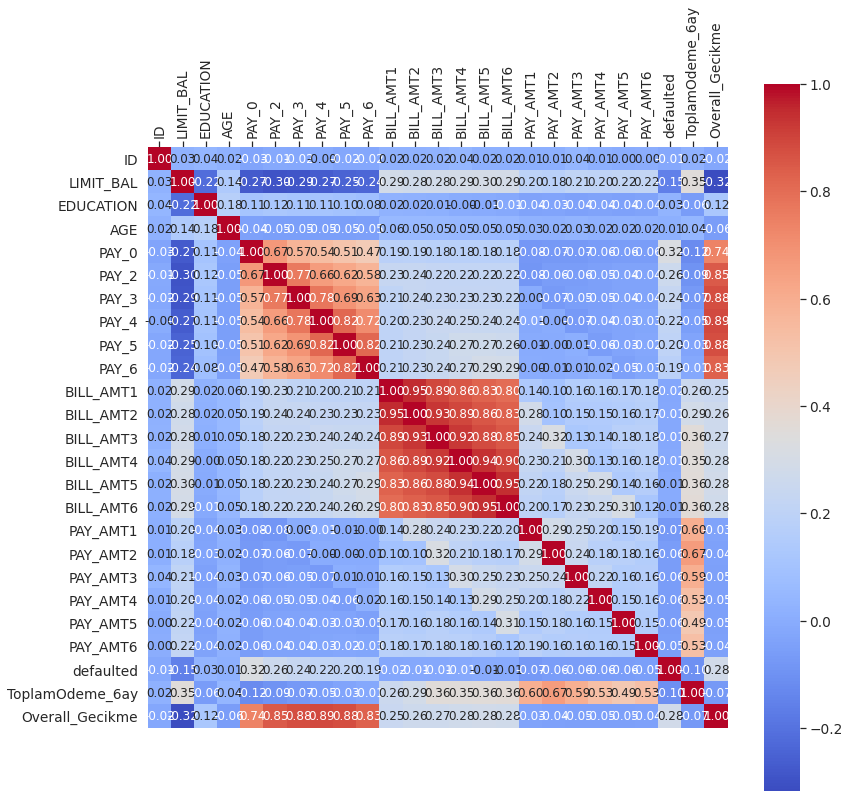

In [ ]:
#RUN
sns.set(font_scale = 1.25)
correlation_matrix = df.corr()
plt.figure(figsize=(13,13))
ax = sns.heatmap(correlation_matrix, vmax=1, cbar=True, square=True, annot=True, fmt='.2f', 
                 annot_kws={'size': 12}, cmap='coolwarm')
ax.xaxis.set_ticks_position('top')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

# There is low corr between varibles and target( defaulted). Bill_Amt has multicolinearity for months , Pay has multicolineratiy for months

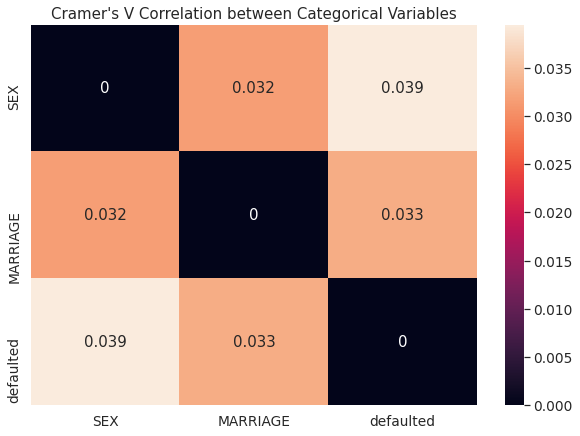

In [ ]:
# Cramer's V : RUN
cat_cols=["SEX","MARRIAGE","defaulted"]
from scipy.stats import chi2_contingency
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

import itertools
corrM = np.zeros((len(cat_cols),len(cat_cols)))
for col1, col2 in itertools.combinations(cat_cols, 2):
    idx1, idx2 = df[cat_cols].columns.get_loc(col1), df[cat_cols].columns.get_loc(col2)
    corrM[idx1, idx2] = cramers_v(df[cat_cols][col1], df[cat_cols][col2])
    corrM[idx2, idx1] = corrM[idx1, idx2]

corr = pd.DataFrame(corrM, index=cat_cols, columns=cat_cols)
fig, ax = plt.subplots(figsize=(10,7))
ax = sns.heatmap(corr, annot=True, ax=ax);ax.set_title("Cramer\'s V Correlation between Categorical Variables");

# There is low corr between varibles Sex, Marriage and target( defaulted). 

In [ ]:
cols_to_transform=
df = pd.get_dummies(df, columns = cols_to_transform)

MODEL

In [ ]:
!pip install pycaret

In [ ]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
from pycaret.classification import *
data_1=setup(data=df,target="default payment next month", train_size = 0.66, normalize = True,
             feature_selection = True, ignore_features = ["ID"])

best_model=compare_models(n_select = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8199,0.7839,0.3777,0.6710,0.4829,0.3841,0.4076,7.510
ridge,Ridge Classifier,0.8198,0.0000,0.3525,0.6874,0.4657,0.3707,0.4008,0.060
lr,Logistic Regression,0.8191,0.7730,0.3536,0.6819,0.4654,0.3695,0.3986,1.549
lda,Linear Discriminant Analysis,0.8190,0.7715,0.3729,0.6689,0.4785,0.3796,0.4035,0.380
lightgbm,Light Gradient Boosting Machine,0.8178,0.7796,0.3793,0.6592,0.4810,0.3802,0.4018,0.553
svm,SVM - Linear Kernel,0.8176,0.0000,0.3276,0.6920,0.4444,0.3516,0.3870,0.378
ada,Ada Boost Classifier,0.8170,0.7757,0.3521,0.6714,0.4615,0.3640,0.3918,1.704
rf,Random Forest Classifier,0.8138,0.7652,0.3713,0.6427,0.4703,0.3671,0.3876,3.806
et,Extra Trees Classifier,0.8066,0.7410,0.3677,0.6099,0.4586,0.3496,0.3663,2.828
nb,Naive Bayes,0.7983,0.7451,0.1840,0.6754,0.2887,0.2139,0.2761,0.053


F1 score is low for base models. After SVM Linear model, I will run SVC-RBF with hyperparameter tunning.

In [ ]:
y = df['defaulted']
X = df.drop(['defaulted','ID','ToplamOdeme_6ay','Overall_Gecikme'], axis=1)

seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = seed, stratify=y)

In [ ]:
# Model 1: Lineas SVC

pipeline = Pipeline(steps=[('scaler', StandardScaler()),
                           ('classifier',   LinearSVC(random_state=seed, tol=1e-5))])

params = [{'classifier__C'      : np.arange(0.1, 10, 0.4), 
           'classifier__penalty': ['l1', 'l2'] 
           }]

kfold = StratifiedKFold(n_splits = 10, random_state = seed)

scorer = make_scorer(f1_score,average='weighted')
grid_search = GridSearchCV(pipeline, param_grid = params, cv = kfold, scoring=scorer, verbose = 1, n_jobs = -1)

grid_search.fit(X_train, y_train)

print(grid_search.best_estimator_,'\n')
LR_test_score = grid_search.score(X_test, y_test)
print('Training accuracy:', grid_search.score(X_train, y_train))
print('Test accuracy    :', LR_test_score)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 13.4min finished


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 LinearSVC(C=6.5, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=1000,
                           multi_class='ovr', penalty='l2', random_state=42,
                           tol=1e-05, verbose=0))],
         verbose=False) 

Training accuracy: 0.7938005752369109
Test accuracy    : 0.7916069509443284


In [ ]:
print('\n',classification_report(y_test, grid_search.predict(X_test)))
print('\n',classification_report(y_train, grid_search.predict(X_train)))


               precision    recall  f1-score   support

           0       0.84      0.93      0.88      7710
           1       0.62      0.37      0.46      2190

    accuracy                           0.81      9900
   macro avg       0.73      0.65      0.67      9900
weighted avg       0.79      0.81      0.79      9900


               precision    recall  f1-score   support

           0       0.84      0.94      0.89     15654
           1       0.64      0.37      0.47      4446

    accuracy                           0.81     20100
   macro avg       0.74      0.65      0.68     20100
weighted avg       0.79      0.81      0.79     20100



Text(0.5, 1.0, 'SVM(linear)')

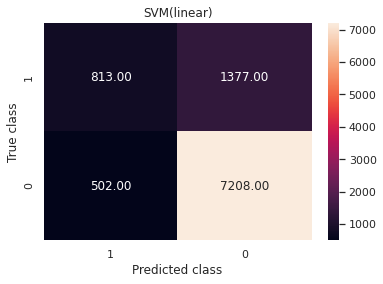

In [ ]:
y_pred = grid_search.predict(X_test)
lr_cm = metrics.confusion_matrix(y_test, y_pred, [1,0])
sns.heatmap(lr_cm, annot=True, fmt='.2f', xticklabels = ["1", "0"], yticklabels = ["1", "0"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('SVM(linear)')

Lİnear SVM has low performance; default class F1 score is 0.46

In [ ]:
# Model 2
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

pipeline = Pipeline(steps=[('scaler', StandardScaler()),
                           ('classifier',SVC(random_state=seed))])

params = [
          {'classifier__kernel': ['rbf'], 
           'classifier__gamma' : ['auto'], 
           'classifier__C'     : [5]}
         ]

kfold = model_selection.KFold(n_splits = 10, random_state=seed)

scorer = make_scorer(f1_score,average='weighted')
grid_search = GridSearchCV(pipeline, params, scoring=scorer, n_jobs=-1, cv=10)
%time grid_result = grid_search.fit(X_train, y_train)

print(); print("Best CV score: %f using %s\n" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

print('Train f1:', grid_search.score(X_train, y_train))
print('Test f1 :', grid_search.score(X_test, y_test))

CPU times: user 40.5 s, sys: 414 ms, total: 40.9 s
Wall time: 4min 3s

Best CV score: 0.471105 using {'classifier__C': 5, 'classifier__gamma': 'auto', 'classifier__kernel': 'rbf'}

Train f1: 0.5272544225514166
Test f1 : 0.4561924561924562


In [ ]:
y_pred = grid_search.predict(X_test)
from sklearn.metrics import f1_score
F1_test=f1_score(y_test, y_pred, average='weighted')
F1_test

0.7929289689041409

In [ ]:
print('\n',classification_report(y_test, grid_search.predict(X_test)))
print('\n',classification_report(y_train, grid_search.predict(X_train)))


               precision    recall  f1-score   support

           0       0.84      0.95      0.89      7710
           1       0.65      0.35      0.46      2190

    accuracy                           0.82      9900
   macro avg       0.74      0.65      0.67      9900
weighted avg       0.80      0.82      0.79      9900


               precision    recall  f1-score   support

           0       0.85      0.96      0.90     15654
           1       0.73      0.41      0.53      4446

    accuracy                           0.84     20100
   macro avg       0.79      0.68      0.71     20100
weighted avg       0.82      0.84      0.82     20100



SVC (RBF)
f1 score for default class is 0.46. we have to search for parameters/ fix unbalanced data problem 

classweight parametresini düzenle, en azından unbalanced data için bişey yapmış olursun. 6 ay pay toplamını kolon olarak ekle, toplam ödeme >0 kolonu ekle

In [ ]:
# Class weighted SVC( RBF) Model

pipeline = Pipeline(steps=[('scaler', StandardScaler()),
                           ('classifier',SVC(random_state=seed))])

params = [
          {'classifier__kernel': ['rbf'], 
           'classifier__gamma' : ['auto'], 
           'classifier__C'     : [5],
           'classifier__class_weight': [{0:0.5,1:1}, 'balanced']}
         ]

kfold = model_selection.KFold(n_splits = 10, random_state=seed)
SVC_grid = model_selection.GridSearchCV(estimator=pipeline,
                                       param_grid=params, 
                                       cv=kfold,
                                       verbose=1,
                                       n_jobs=-1)
scorer = make_scorer(f1_score, average = 'weighted')
grid_search = GridSearchCV(pipeline, params, scoring=scorer, n_jobs=-1, cv=10)

%time grid_result = grid_search.fit(X_train, y_train)

print(); print("Best CV score: %f using %s\n" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

print('Train f1:', grid_search.score(X_train, y_train))
print('Test f1 :', grid_search.score(X_test, y_test))

CPU times: user 29 s, sys: 270 ms, total: 29.3 s
Wall time: 6min 40s

Best CV score: 0.800215 using {'classifier__C': 5, 'classifier__class_weight': {0: 0.5, 1: 1}, 'classifier__gamma': 'auto', 'classifier__kernel': 'rbf'}

Train f1: 0.8199851421363548
Test f1 : 0.7968506469014772


In [ ]:
print('\n',classification_report(y_test, grid_search.predict(X_test)))
print('\n',classification_report(y_train, grid_search.predict(X_train)))


               precision    recall  f1-score   support

           0       0.86      0.89      0.88      7710
           1       0.56      0.48      0.52      2190

    accuracy                           0.80      9900
   macro avg       0.71      0.69      0.70      9900
weighted avg       0.79      0.80      0.80      9900


               precision    recall  f1-score   support

           0       0.87      0.91      0.89     15654
           1       0.62      0.54      0.58      4446

    accuracy                           0.82     20100
   macro avg       0.75      0.72      0.73     20100
weighted avg       0.82      0.82      0.82     20100



Text(0.5, 1.0, 'SVC(rbf)_classweigthed')

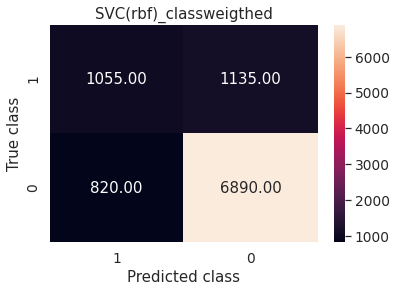

In [ ]:
y_pred = grid_search.predict(X_test)
lr_cm = metrics.confusion_matrix(y_test, y_pred, [1,0])
sns.heatmap(lr_cm, annot=True, fmt='.2f', xticklabels = ["1", "0"], yticklabels = ["1", "0"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('SVC(rbf)_classweigthed')

In [ ]:
# MLPClassifier

pipeline = Pipeline(steps=[('scaler', StandardScaler()),
                           ('classifier',MLPClassifier(random_state=seed))])

param_grid = {
    'hidden_layer_sizes': [(50),(100),(150)],
    'activation': [ 'relu'],
    'solver': ['adam'],
    'alpha': [0.08, 0.1,0.5],
    'learning_rate': ['constant']}

scorer = make_scorer(f1_score, average = 'weighted')
grid = RandomizedSearchCV(MLPClassifier(random_state=seed), param_grid, scoring=scorer, n_jobs=-1, cv=5, verbose=1)

grid = grid.fit(X_train, y_train)
print(); print("Best CV score: %f using %s\n" % (grid.best_score_, grid.best_params_))
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']

print('Train f1:', grid.score(X_train, y_train))
print('Test f1 :', grid.score(X_test, y_test))

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  7.7min finished



Best CV score: 0.740210 using {'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': 150, 'alpha': 0.1, 'activation': 'relu'}

Train f1: 0.7133304225142941
Test f1 : 0.7020654109743608


In [ ]:
print('\n',classification_report(y_test, grid.predict(X_test)))
print('\n',classification_report(y_train, grid.predict(X_train)))


               precision    recall  f1-score   support

           0       0.79      0.98      0.87      7710
           1       0.44      0.06      0.11      2190

    accuracy                           0.78      9900
   macro avg       0.61      0.52      0.49      9900
weighted avg       0.71      0.78      0.70      9900


               precision    recall  f1-score   support

           0       0.79      0.99      0.88     15654
           1       0.60      0.08      0.14      4446

    accuracy                           0.78     20100
   macro avg       0.69      0.53      0.51     20100
weighted avg       0.75      0.78      0.71     20100



MLPClassifier doesn't perform well.f1 score for default class is very low 0.11

Best Model is SCC( RBF) with classweighted one.Since recall is the lowest. I don't want to miss/wrong prediction of defaulted class 